# 2つの変数の記述統計

## 2つの変数の関係
- 量的変数同士の関係を「相関」という
- 質的変数同士の関係を「連関」という

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# データの読み込み
df = pd.read_csv("../data/method_data.csv")

In [4]:
df.head()

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,method
0,1,大村,男,嫌い,好き,13,6,10,C
1,2,本多,男,嫌い,好き,14,10,13,B
2,3,川崎,男,好き,好き,7,6,8,B
3,4,多村,男,好き,好き,12,10,15,A
4,5,松中,男,嫌い,嫌い,10,5,8,B


## 散布図

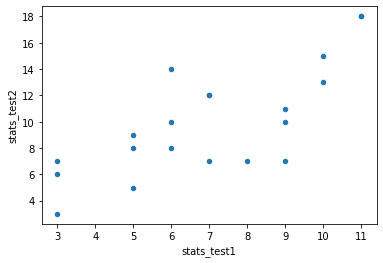

In [15]:
# 散布図を書いてみる
df.plot.scatter(x='stats_test1', y='stats_test2')

- 散布図を描いた場合に、右肩あがりの傾向にあるものを”正の相関”があるという

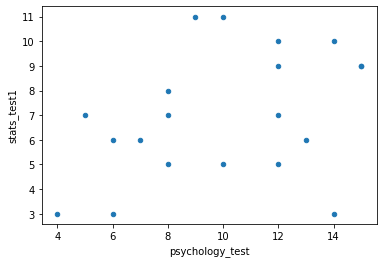

In [16]:
# 心理学テストと統計テスト1の関係をみてみる
df.plot.scatter(x='psychology_test', y='stats_test1')

- 上と比較すると、ちらばっているように見える＝相関が弱いことを意味している

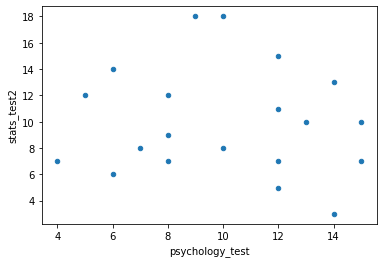

In [8]:
# 心理学テストと統計テスト2の関係を見てみる
df.plot.scatter(x='psychology_test', y='stats_test2')

- ほぼ無相関

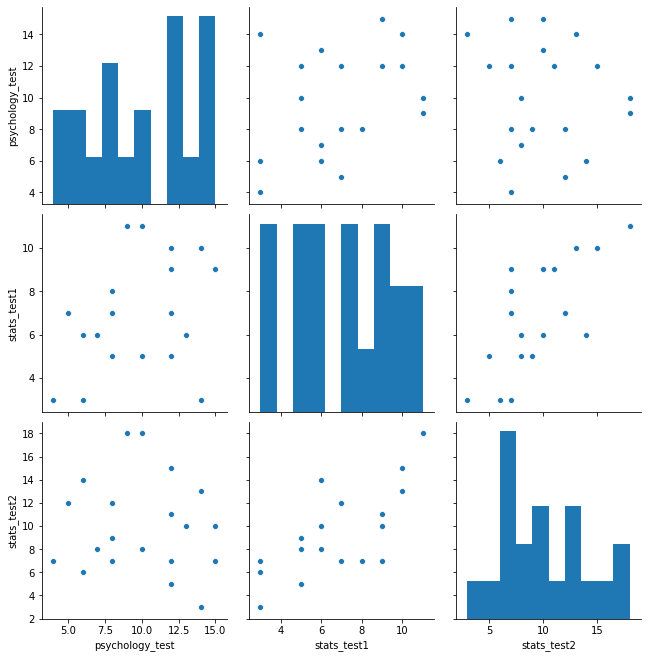

In [13]:
# Seabornを使って散布図を複数描いてみる
cols = ['psychology_test', 'stats_test1', 'stats_test2']
sns.pairplot(df[cols], size=3)

## 共分散

- 散布図は、2変数の相関を視覚的に把握するのに有効
- ただし、すべてレポートに書くと煩雑になる
- 相関の強さを示す「相関係数」を使うのが一般的
- 共分散：偏差の積の平均
- 偏差：平均からの偏差

In [25]:
# 分散共分散行列
df[['stats_test1', 'stats_test2']].cov()

,stats_test1,stats_test2
stats_test1,6.631579,7.947368
stats_test2,7.947368,16.947368


- 同じ項目同士： 不偏分散
- 違う項目同士： 不偏共分散

- 共分散は、2変数の関係の強さを反映する指標
- ただし、その大きさが測定単位に依存してしまうという問題点がある
- 標準偏差を利用することで、測定単位の影響を受けない相関の指標「相関係数」を求めることができる

## 相関係数

相関係数
$$
    r_{xy} = \frac{s_{xy}}{s_x s_y}
$$

In [29]:
# 相関行列（2つの変数）
df[['stats_test1', 'stats_test2']].corr()

,stats_test1,stats_test2
stats_test1,1.000000,0.749659
stats_test2,0.749659,1.000000


In [30]:
# 相関係数（すべて）
df.corr()

,id,psychology_test,stats_test1,stats_test2
id,1.000000,-0.020821,0.148550,-0.099407
psychology_test,-0.020821,1.000000,0.382665,-0.093505
stats_test1,0.148550,0.382665,1.000000,0.749659
stats_test2,-0.099407,-0.093505,0.749659,1.000000


## クロス集計表

In [32]:
df.head()

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,method
0,1,大村,男,嫌い,好き,13,6,10,C
1,2,本多,男,嫌い,好き,14,10,13,B
2,3,川崎,男,好き,好き,7,6,8,B
3,4,多村,男,好き,好き,12,10,15,A
4,5,松中,男,嫌い,嫌い,10,5,8,B


In [34]:
# クロス集計
pd.crosstab(df['math'], df['stats'])

stats,好き,嫌い
math,,
好き,4,2
嫌い,4,10


## ファイ係数

- ファイ係数は1と0の2つの値からなう変数に対して計算される相関英数

In [37]:
Math = df['math']
Stat = df['stats']

In [38]:
# 2値変数への変換
MathDigitize = np.array([1 if x == "好き" else 0 for x in Math])
print(MathDigitize)
StatDigitize = np.array([1 if x == "好き" else 0  for x in Stat])
print(StatDigitize)

[0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0]


In [39]:
# ファイ係数
np.corrcoef(MathDigitize,StatDigitize)

array([[1.        , 0.35634832],
       [0.35634832, 1.        ]])